In [120]:
import pandas as pd

In [121]:
df=pd.read_csv('EDA_Data.csv', index_col=0)

<ipython-input-121-d6793a10ebbb>:1: DtypeWarning: Columns (131) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('EDA_Data.csv', index_col=0)


In [122]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 497282 entries, 0 to 499999
Data columns (total 136 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    ACCS_MTHD_KEY               object 
 1    ACTVTN_DT                   float64
 2    ACC                         float64
 3    SIM_TYPE                    object 
 4    TRANG_THAI                  object 
 5    PROVINCE_CODE               object 
 6    PBH                         object 
 7    GEO_CITY_NAME               object 
 8    GEO_CNTY_NAME               object 
 9    CD_2G                       int64  
 10   HVC_T                       int64  
 11   HVC_T_1                     int64  
 12   HVC_T_2                     int64  
 13   SERVICE_CODE                object 
 14   P1_SONGAY                   float64
 15   NAP_THE_T                   float64
 16   TKC_T                       float64
 17   TKKM_T                      float64
 18   TKC_THOAI_T                 float64
 19   TKKM_

In [123]:
from datetime import datetime
current_date = datetime.strptime('2024-09-01',"%Y-%m-%d")
df['super_period_expiry_date'] = pd.to_datetime(df['super_period_expiry_date'], format='%m/%d/%Y', errors='coerce')
df['service_fee_expiry_date'] = pd.to_datetime(df['service_fee_expiry_date'], format='%m/%d/%Y', errors='coerce')
df['account_disconnection_date'] = pd.to_datetime(df['account_disconnection_date'], format='%m/%d/%Y', errors='coerce')

df['interval_tolock'] = df['super_period_expiry_date'].apply(
    lambda x: (x-current_date ).days if pd.notnull(x) else 0
)

df['interval_totopay'] = df['service_fee_expiry_date'].apply(
    lambda x: (x-current_date ).days if pd.notnull(x) else 0
)

df['interval_tocancel'] = df['account_disconnection_date'].apply(
    lambda x: (x-current_date ).days if pd.notnull(x) else 0
)

In [ ]:
columns_to_log_transform = [
    'NAP_THE_T', 'TKC_T', 'TKKM_T', 'TKC_THOAI_T', 'TKKM_THOAI_T', 'TKC_THOAI_ONNET_T', 'TKC_THOAI_OFFNET_T', 'TKC_SMS_T',
    'TKKM_SMS_T', 'TKC_SMS_ONNET_T', 'TKC_SMS_OFFNET_T', 'TKC_DATA_T', 'TKKM_DATA_T', 'TKC_KHAC_T', 'TKC_VAS_T', 'LL_THOAI_T',
    'LL_ONNET_IC_T', 'LL_ONNET_OG_T', 'LL_OFFNET_IC_T', 'LL_OFFNET_OG_T', 'LL_SMS_T', 'LL_SMS_ONNET_T', 'LL_SMS_OFFNET_T', 'LL_DATA_T',
    'TKC_MYTV_T', 'NAP_THE_T_1', 'TKC_T_1', 'TKKM_T_1', 'TKC_THOAI_T_1', 'TKKM_THOAI_T_1', 'TKC_THOAI_ONNET_T_1', 'TKC_THOAI_OFFNET_T_1',
    'TKC_SMS_T_1', 'TKKM_SMS_T_1', 'TKC_SMS_ONNET_T_1', 'TKC_SMS_OFFNET_T_1', 'TKC_DATA_T_1', 'TKKM_DATA_T_1', 'TKC_KHAC_T_1', 'TKC_VAS_T_1',
    'LL_THOAI_T_1', 'LL_ONNET_IC_T_1', 'LL_ONNET_OG_T_1', 'LL_OFFNET_IC_T_1', 'LL_OFFNET_OG_T_1', 'LL_SMS_T_1', 'LL_SMS_ONNET_T_1',
    'LL_SMS_OFFNET_T_1', 'LL_DATA_T_1', 'TKC_MYTV_T_1', 'NAP_THE_T_2', 'TKC_T_2', 'TKKM_T_2', 'TKC_THOAI_T_2', 'TKKM_THOAI_T_2',
    'TKC_THOAI_ONNET_T_2', 'TKC_THOAI_OFFNET_T_2', 'TKC_SMS_T_2', 'TKKM_SMS_T_2', 'TKC_SMS_ONNET_T_2', 'TKC_SMS_OFFNET_T_2',
    'TKC_DATA_T_2', 'TKKM_DATA_T_2', 'TKC_KHAC_T_2', 'TKC_VAS_T_2', 'LL_THOAI_T_2', 'LL_ONNET_IC_T_2', 'LL_ONNET_OG_T_2',
    'LL_OFFNET_IC_T_2', 'LL_OFFNET_OG_T_2', 'LL_SMS_T_2', 'LL_SMS_ONNET_T_2', 'LL_SMS_OFFNET_T_2', 'LL_DATA_T_2', 'TKC_MYTV_T_2'
]

for column in columns_to_log_transform:
    if column in df.columns: 
        df[column] = np.log1p(df[column])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df[columns_to_log_transform] = imputer.fit_transform(df[columns_to_log_transform])

In [ ]:
df_sample = df.sample(frac=0.7, random_state=42)

X = df_sample .drop(columns=['label','ACCS_MTHD_KEY','ACTVTN_DT','ACC','SIM_TYPE','PROVINCE_CODE','PBH','GEO_CITY_NAME','GEO_CNTY_NAME','TOT_RVN_PACKAGE','SERVICE_CODE_MUAGOI','SERVICE_CODE','APP_NAME','P2_CHUKY','P1_SONGAY','service_fee_expiry_date','super_period_expiry_date','account_disconnection_date'])  # Features
y = df_sample ['label']  # Target variable

In [127]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 348097 entries, 286722 to 396639
Data columns (total 121 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    TRANG_THAI              object 
 1    CD_2G                   int64  
 2    HVC_T                   int64  
 3    HVC_T_1                 int64  
 4    HVC_T_2                 int64  
 5    NAP_THE_T               float64
 6    TKC_T                   float64
 7    TKKM_T                  float64
 8    TKC_THOAI_T             float64
 9    TKKM_THOAI_T            float64
 10   TKC_THOAI_ONNET_T       float64
 11   TKC_THOAI_OFFNET_T      float64
 12   TKC_SMS_T               float64
 13   TKKM_SMS_T              float64
 14   TKC_SMS_ONNET_T         float64
 15   TKC_SMS_OFFNET_T        float64
 16   TKC_DATA_T              float64
 17   TKKM_DATA_T             float64
 18   TKC_KHAC_T              float64
 19   TKC_VAS_T               float64
 20   LL_THOAI_T              float64
 21   LL_ONNET

In [ ]:
object_cols = X.select_dtypes(include=['object']).columns

for col in object_cols:
    X[col] = X[col].astype(str)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in object_cols:
    X[col] = le.fit_transform(X[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class_counts = y.value_counts()
total_samples = len(y)
num_classes = len(class_counts)

class_weights = {cls: total_samples / (num_classes * count) for cls, count in class_counts.items()}

print("Calculated Class Weights:", class_weights)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42, class_weight={0: 0.55, 1: 30.15})
model.fit(X_train, y_train)


Calculated Class Weights: {0: 0.5551874830539562, 1: 5.030012716027975}


Feature Importances:
             Feature  Importance
78      LL_DATA_T_2    0.069322
16       TKC_DATA_T    0.034209
5         NAP_THE_T    0.029128
27  LL_SMS_OFFNET_T    0.023813
53      LL_DATA_T_1    0.023219
..              ...         ...
17      TKKM_DATA_T    0.000000
18       TKC_KHAC_T    0.000000
68     TKC_KHAC_T_2    0.000000
85        role_home    0.000000
43     TKC_KHAC_T_1    0.000000

[121 rows x 2 columns]


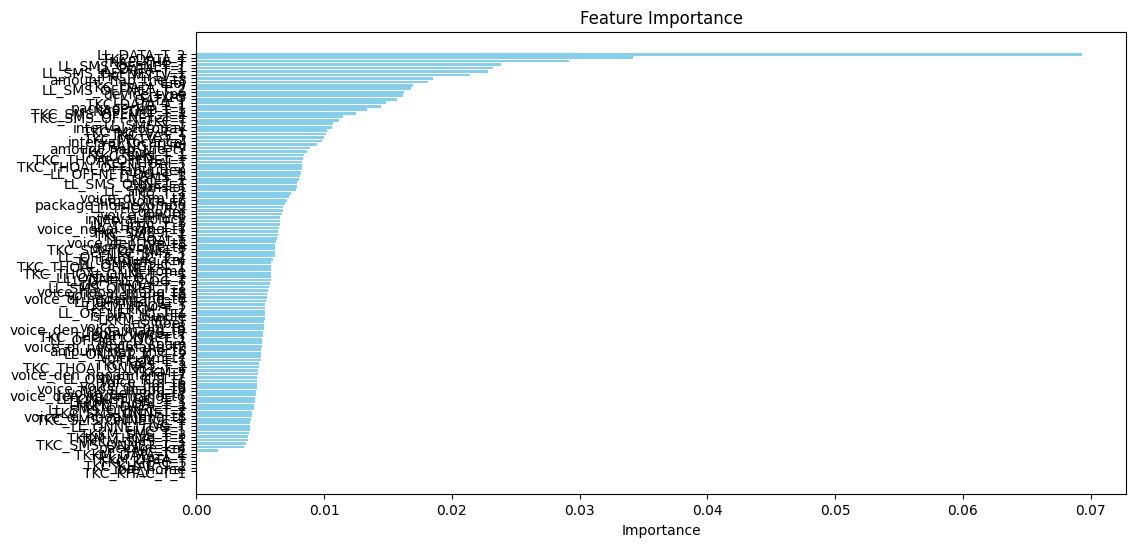

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()


In [131]:
feature_importance_df.head(20)

,Feature,Importance
78,LL_DATA_T_2,0.069322
16,TKC_DATA_T,0.034209
5,NAP_THE_T,0.029128
27,LL_SMS_OFFNET_T,0.023813
53,LL_DATA_T_1,0.023219
52,LL_SMS_OFFNET_T_1,0.022862
29,TKC_MYTV_T,0.021387
99,amount_nap_the_t8,0.018551
116,tuoi,0.018119
66,TKC_DATA_T_2,0.016985


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     62700
           1       0.52      0.16      0.25      6920

    accuracy                           0.90     69620
   macro avg       0.72      0.57      0.60     69620
weighted avg       0.87      0.90      0.88     69620

[[61654  1046]
 [ 5804  1116]]


Feature Importances:
                Feature    Importance
52   LL_SMS_OFFNET_T_1  4.671589e-02
27     LL_SMS_OFFNET_T  3.657351e-02
5            NAP_THE_T  3.409087e-02
77   LL_SMS_OFFNET_T_2  3.358928e-02
107  amount_nap_the_t7  3.211692e-02
..                 ...           ...
67       TKKM_DATA_T_2  1.130831e-04
43        TKC_KHAC_T_1  1.069669e-04
68        TKC_KHAC_T_2  9.227825e-05
17         TKKM_DATA_T  7.285227e-08
42       TKKM_DATA_T_1  5.126625e-08

[121 rows x 2 columns]


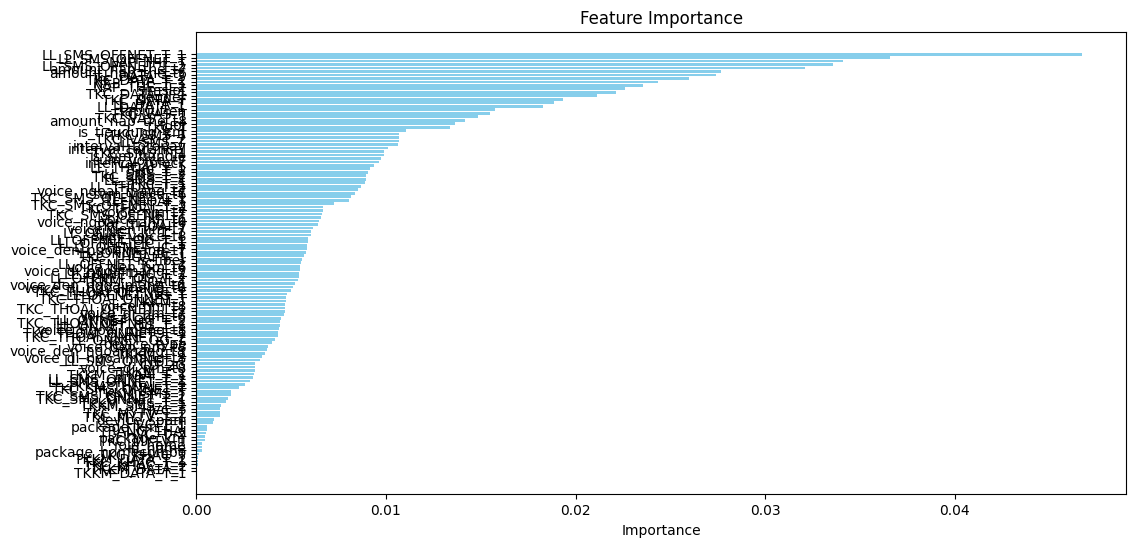

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

In [134]:
feature_importance_df.head(20)

,Feature,Importance
52,LL_SMS_OFFNET_T_1,0.046716
27,LL_SMS_OFFNET_T,0.036574
5,NAP_THE_T,0.034091
77,LL_SMS_OFFNET_T_2,0.033589
107,amount_nap_the_t7,0.032117
115,amount_nap_the_t6,0.027680
78,LL_DATA_T_2,0.027391
66,TKC_DATA_T_2,0.025968
30,NAP_THE_T_1,0.024371
55,NAP_THE_T_2,0.023536


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]

model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.80      0.87     62700
           1       0.25      0.62      0.36      6920

    accuracy                           0.78     69620
   macro avg       0.60      0.71      0.61     69620
weighted avg       0.88      0.78      0.82     69620



Feature Importances:
             Feature  Importance
78      LL_DATA_T_2    0.069322
16       TKC_DATA_T    0.034209
5         NAP_THE_T    0.029128
27  LL_SMS_OFFNET_T    0.023813
53      LL_DATA_T_1    0.023219
..              ...         ...
17      TKKM_DATA_T    0.000000
18       TKC_KHAC_T    0.000000
68     TKC_KHAC_T_2    0.000000
85        role_home    0.000000
43     TKC_KHAC_T_1    0.000000

[121 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

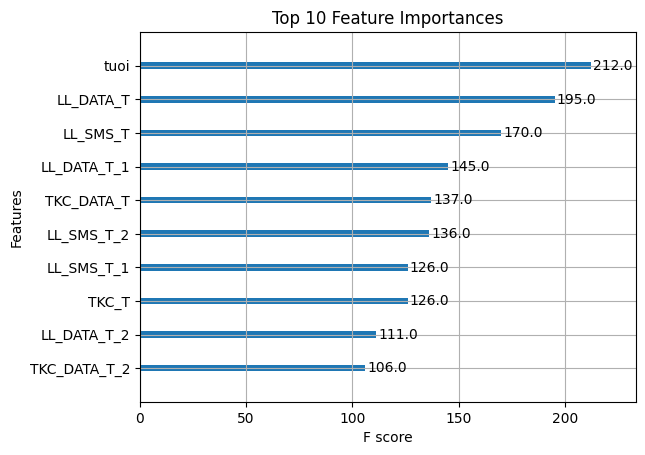

In [ ]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10, title="Top 10 Feature Importances")
plt.show()

In [137]:
 importance_df.head(20)

,Feature,Importance
78,LL_DATA_T_2,0.069322
16,TKC_DATA_T,0.034209
5,NAP_THE_T,0.029128
27,LL_SMS_OFFNET_T,0.023813
53,LL_DATA_T_1,0.023219
52,LL_SMS_OFFNET_T_1,0.022862
29,TKC_MYTV_T,0.021387
99,amount_nap_the_t8,0.018551
116,tuoi,0.018119
66,TKC_DATA_T_2,0.016985
